In [ ]:
pip install pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data.csv')
df

,Student_ID,Age,Gender,Marks,Attendance
0,101,20.0,Male,85.0,90.0
1,102,21.0,Female,78.0,85.0
2,103,NaN,Male,92.0,95.0
3,104,22.0,Female,88.0,NaN
4,105,21.0,Male,300.0,80.0
5,106,20.0,Female,65.0,70.0
6,107,23.0,Male,72.0,75.0
7,108,22.0,Female,NaN,88.0
8,109,21.0,Male,81.0,82.0
9,110,20.0,Female,79.0,85.0


In [ ]:
print(df.isnull().sum())

Student_ID    0
Age           2
Gender        0
Marks         1
Attendance    1
dtype: int64


In [ ]:
#Method 2 i have used to remove the Nan values by used to inplace with mean of the table
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Marks'].fillna(df['Marks'].mean(),inplace=True)
df = df[(df['Marks'] >= 0) & (df['Marks'] <= 100)]
df['Age'] = np.floor(df['Age']).astype(int)
df

/tmp/ipython-input-116418358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-116418358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Student_ID,Age,Gender,Marks,Attendance
0,101,20,Male,85.0,90.0
1,102,21,Female,78.0,85.0
2,103,21,Male,92.0,95.0
3,104,22,Female,88.0,NaN
5,106,20,Female,65.0,70.0
6,107,23,Male,72.0,75.0
8,109,21,Male,81.0,82.0
9,110,20,Female,79.0,85.0
11,111,24,Male,45.0,60.0
12,112,22,Female,90.0,98.0


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Here we can see the index 10 is not present as i have duplicates
df = df.drop_duplicates()
df

,Student_ID,Age,Gender,Marks,Attendance
0,101,20,Male,85.0,90.0
1,102,21,Female,78.0,85.0
2,103,21,Male,92.0,95.0
3,104,22,Female,88.0,NaN
5,106,20,Female,65.0,70.0
6,107,23,Male,72.0,75.0
8,109,21,Male,81.0,82.0
9,110,20,Female,79.0,85.0
11,111,24,Male,45.0,60.0
12,112,22,Female,90.0,98.0


In [ ]:
df.to_csv("cleaned_data.csv")

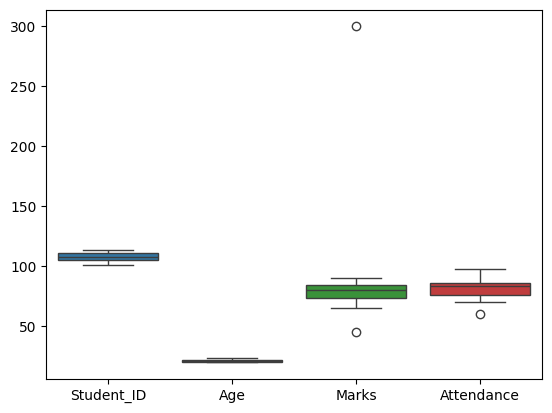

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()

In [ ]:
numeric_cols = ['Age', 'Marks', 'Attendance']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~(
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) |
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]
df

,Student_ID,Age,Gender,Marks,Attendance
0,101,20,Male,85.0,90.0
1,102,21,Female,78.0,85.0
2,103,21,Male,92.0,95.0
3,104,22,Female,88.0,NaN
5,106,20,Female,65.0,70.0
6,107,23,Male,72.0,75.0
8,109,21,Male,81.0,82.0
9,110,20,Female,79.0,85.0
12,112,22,Female,90.0,98.0
13,113,21,Female,76.0,83.0
